In [5]:
import numpy as np
import math
import random
import pandas as pd

In [33]:
# generate sequence of data
UPPER_BOUND = 5000
NUM_PTS = 100
choices = random.sample(range(UPPER_BOUND), NUM_PTS)
ground_truth_max = max(choices)
stop_idx = int(round((1 / math.e)*(len(choices)+1), 0))

# identify threshold value
seen_choices = choices[:stop_idx]
max_seen = max(seen_choices)

# go through remaining options; stop when we find a number greater than max_seen
# if we dont see anything greater, keep the last seen
unseen_choices = choices[stop_idx:]
for i in unseen_choices:
    selection = i
    if i > max_seen:
        break
    else:
        continue
        
print 'max seen', max_seen
print 'selected', selection
print 'ground truth', ground_truth_max

if selection < ground_truth_max:
    print '>>> failed to locate global max'
else:
    print '>>> sucessfully located global max'

max seen 4930
selected 4948
ground truth 4948
>>> sucessfully located global max


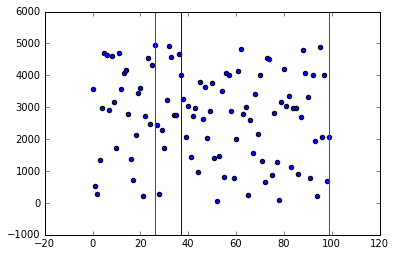

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(range(NUM_PTS), choices)
plt.axvline(stop_idx, c = 'b') # stop point
plt.axvline(np.argmax(seen_choices), c = 'y') # max of seen
plt.axvline(np.argmax(choices), c = 'g') # ground truth max
plt.axvline(np.where(np.array(choices) == selection)[0][0], c = 'r') # selection

# simulate 1000 trials

In [25]:
def simulate():
    # generate sequence of data
    UPPER_BOUND = 5000
    NUM_PTS = 100
    choices = random.sample(range(UPPER_BOUND), NUM_PTS)
    ground_truth_max = max(choices)
    stop_idx = int(round((1 / math.e)*(len(choices)+1), 0))

    # identify threshold value
    seen_choices = choices[:stop_idx]
    max_seen = max(seen_choices)

    # go through remaining options; stop when we find a number greater than max_seen
    # if we dont see anything greater, keep the last seen
    unseen_choices = choices[stop_idx:]
    for i in unseen_choices:
        selection = i
        if i > max_seen:
            break
        else:
            continue

    if selection < ground_truth_max:
        return 'failed'
    else:
        return 'success'

In [32]:
simulations = pd.Series([simulate() for i in range(1000)])
simulations.value_counts()

failed     631
success    369
dtype: int64